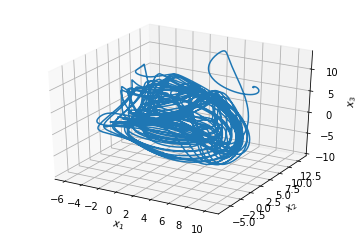

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# these are our constants
N = 5  # number of variables
F = 8  # forcing

def Lorenz96(x,t):

  # compute state derivatives
  d = np.zeros(N)
  # first the 3 edge cases: i=1,2,N
  d[0] = (x[1] - x[N-2]) * x[N-1] - x[0]
  d[1] = (x[2] - x[N-1]) * x[0]- x[1]
  d[N-1] = (x[0] - x[N-3]) * x[N-2] - x[N-1]
  # then the general case
  for i in range(2, N-1):
      d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
  # add the forcing term
  d = d + F

  # return the state derivatives
  return d

x0 = F*np.ones(N) # initial state (equilibrium)
x0[1] += 0.01 # add small perturbation to 20th variable
t = np.arange(0.0, 60.0, 0.005)

x = odeint(Lorenz96, x0, t)

# plot first three variables
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x[:,0],x[:,1],x[:,2])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.show()

In [4]:
np.save('l96/data/l96_data_N5.npy', x)